<a href="https://colab.research.google.com/github/anhelus/pcs-exercises/blob/master/01_libs/02_visualization/02_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Esercitazione 5 - Seaborn**

In qeusta esercitazione vedremo come creare dei plot mediante Seaborn.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Caricamento del dataset**

Iniziamo caricando il dataset `tips`.

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**La funzione `relplot()`**

Vediamo adesso quale è l'andamento del rapporto tra conto e mance giorno per giorno. Inoltre, diamo ai diversi simboli delle dimensioni direttamente proporzionali all'entità della mancia.

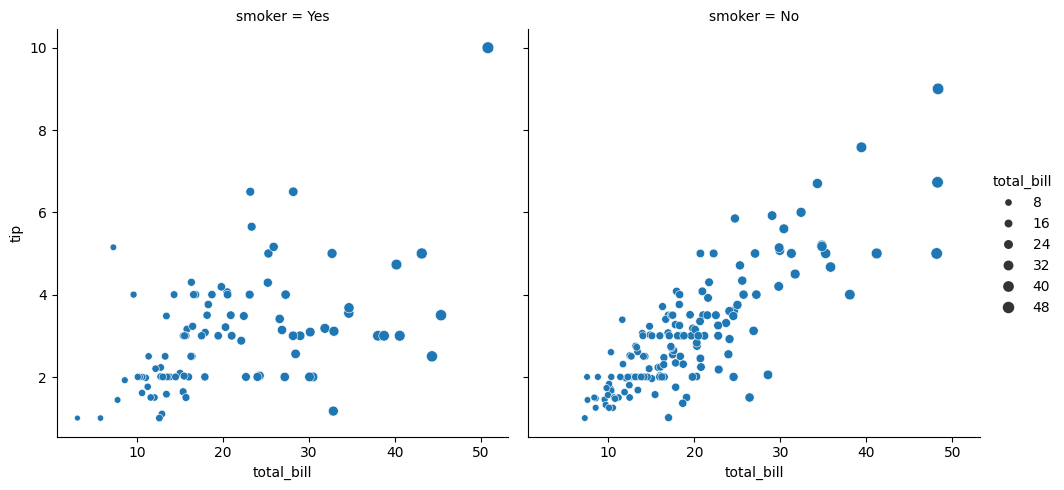

In [3]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='smoker',
    size='total_bill')

La funzione [`replot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html) ci offre un esempio di *scatter plot*, ovvero una particolare tipologia di grafico che viene spesso utilizzato per visualizzare come si "diffondono" dei dati su due o tre dimensioni.

Proviamo adesso a vedere come variano le mance in funzione del conto a seconda del fatto che i clienti siano uomini o donne:

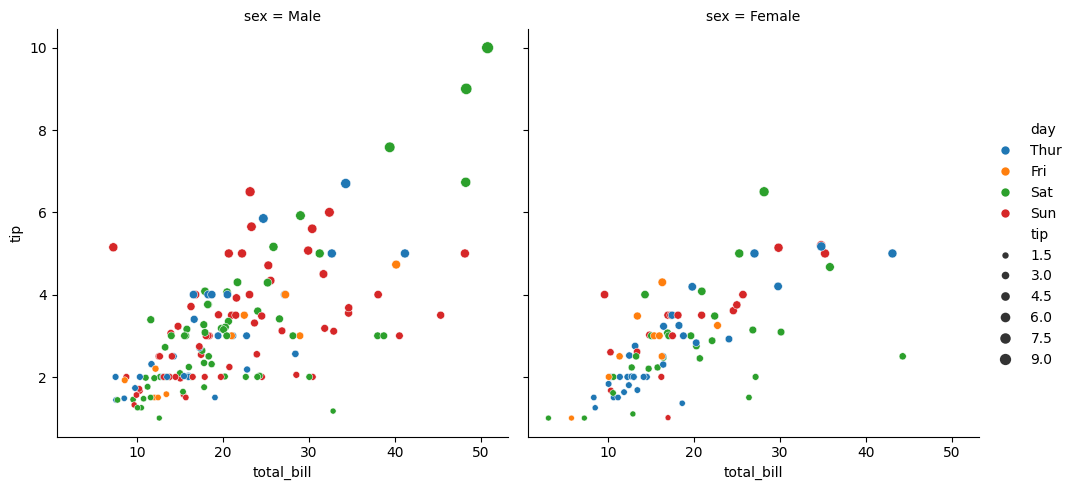

In [4]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='sex',
    size='tip',
    hue='day')

Nel grafico precedente abbiamo assegnato anche il parametro `hue`, che assegna una tinta differente a seconda del valore associato alla categoria indicata dal parametro (in questo caso, il giorno della settimana).

**La funzione `lmplot()`**

Una variante della funzione `relplot()` è la [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html), la cui sintassi e parametrizzazione è praticamente equivalente, ma che permette di integrare anche le approssimazioni ai minimi quadrati dei dati visualizzati. Ad esempio:

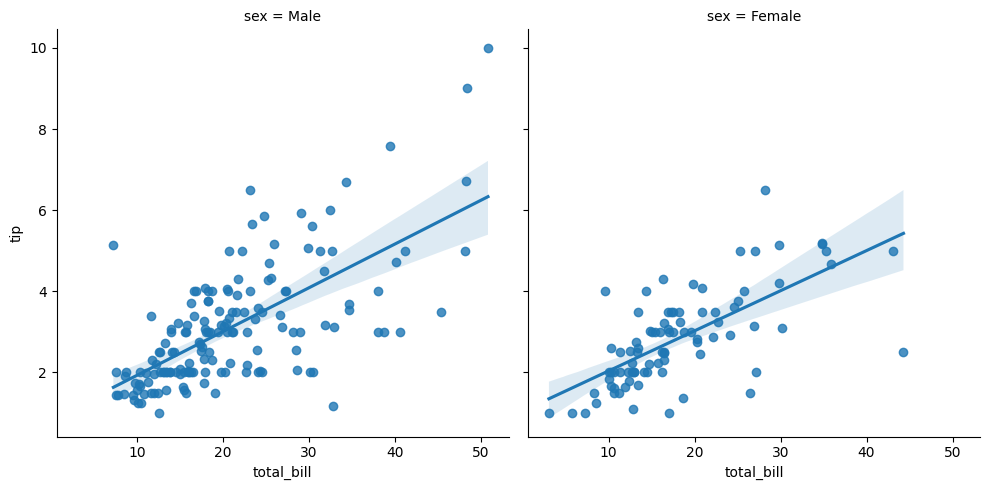

In [5]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='sex')

Se proviamo ad impostare il parametro `hue` otterremo risultati più "granulari".

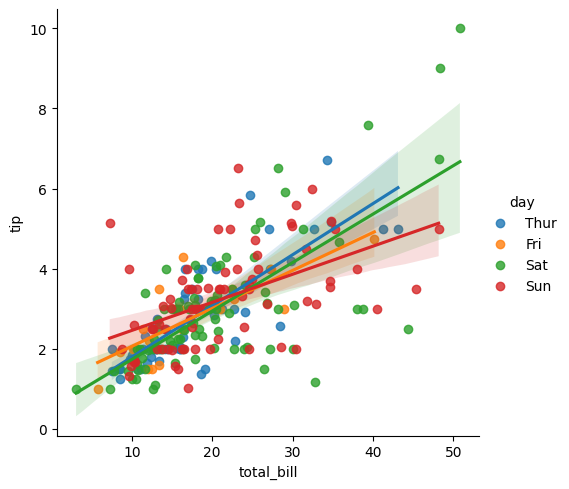

In [6]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='day')

plt.show()

Dal grafico precedente possiamo quindi scoprire come il ristorante non sia aperto il sabato e la domenica a pranzo, oltre che il giovedì a cena.

La `lmplot()` non supporta esclusivamente regressioni di tipo lineare. Ad esempio, potremmo specificare il parametro `order`, che fa in modo che i punti siano approssimati mediante un polinomio di ordine pari al valore indicato.

Ancora, potremmo usare una regressione non parametrica mediante il parametro `lowess`, che in pratica calcola un modello lineare "a tratti", pesato sulla base dei valori assunti in determinati intervalli dall'insieme dei punti.

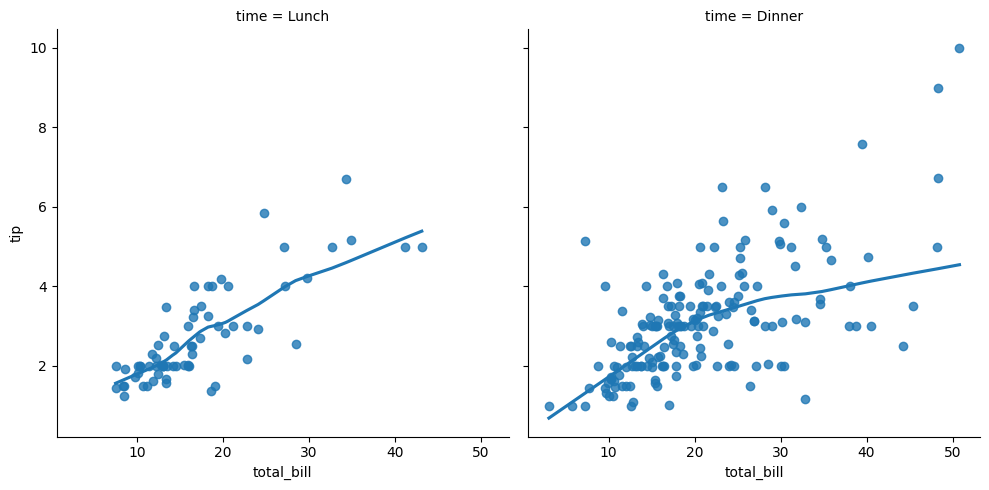

In [7]:
sns.lmplot(
    data=tips,
    x='total_bill',
    y='tip',
    col='time',
    lowess=True)

plt.show()

Esistono poi anche altre possibilità per la regressione: ad esempio, si potrebbe utilizzare un approccio basato sulla minimizzazione dell'influenza degli outlier, oppure una regressione non parametrica, come quella mostrata nella figura precedente. Per una valutazione completa, si rimanda alla [reference](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

**La funzione `displot()`**

Un'altra possibilità è quella di visualizzare la distribuzione dei dati mediante la funzione [`displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot), sfruttando magari delle approssimazioni mediante tecniche come la [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

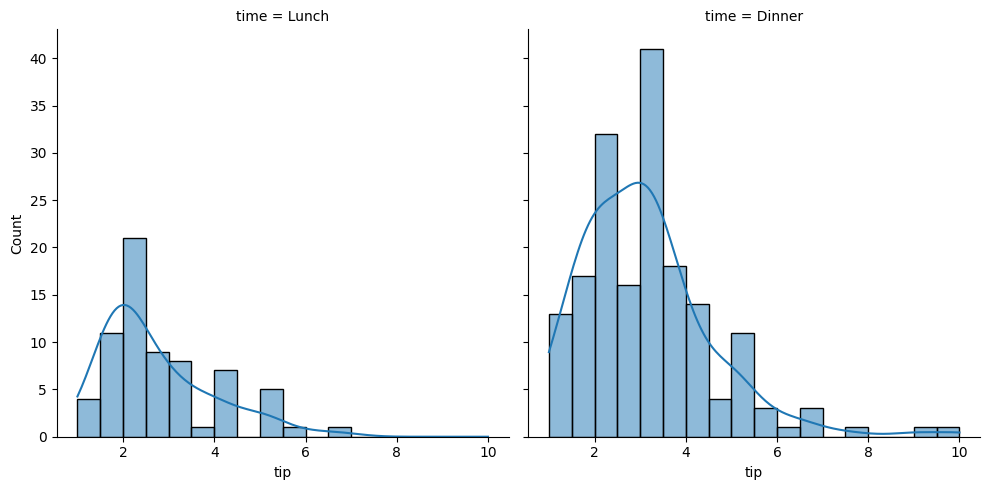

In [8]:
sns.displot(
    data=tips,
    x='tip',
    col='time',
    kde=True)

plt.show()

Dal grafico precedente scopriamo che è decisamente più conveniente fare il cameriere di sera, in quanto le mance sono più elevate.

**La funzione `catplot()`**

Vediamo adesso la funzione [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html), che produce grafici specificamente pensati per visualizzare come si distribuiscono i dati a seconda delle diverse categorie presenti.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


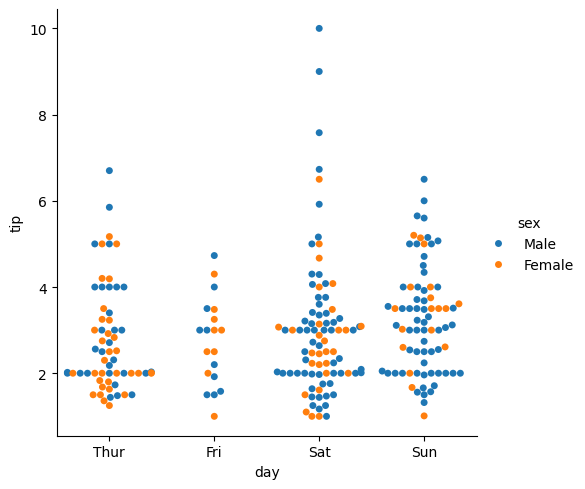

In [9]:
sns.catplot(
    data=tips,
    kind='swarm',
    x='day',
    y='tip',
    hue='sex')

plt.show()

Nel grafico precedente possiamo vedere come si "distribuiscono" le mance date da uomini e donne durante le diverse giornate di apertura. Nella figura successiva possiamo vedere lo stesso grafico con una differente tipologia di visualizzazione, chiamata *violin plot*, e determinata modificando il parametro `kind`:

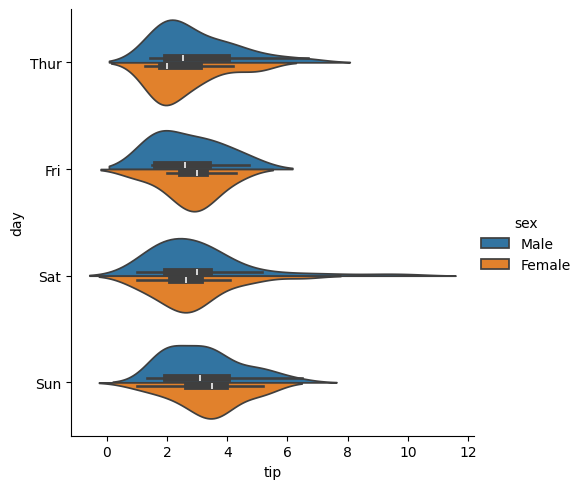

In [10]:
sns.catplot(
    data=tips,
    kind='violin',
    x='tip',
    y='day',
    hue='sex',
    split=True)

plt.show()

**La funzione `boxplot()`**

In ultimo, vediamo la funzione [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html), che viene utilizzata per mostrare i cosiddetti *box-and-whisker* plot.

Questo tipo di plot è composto da una "scatola" di forma rettangolare (*box*) che mostra il range interquartile relativo alla distribuzione dei dati. Oltre questa, ci sono delle linee (*whisker*) che rappresentano gli estremi veri e propri della distribuzione. In particolare, i whisker sono posizionati a $Q1 - 1.5 \cdot IQR$ e $Q3 + 1.5 \cdot IQR$; tutti i punti che cadono al di fuori di questo intervallo sono considerati degli *outlier*, e vengono contrassegnati mediante dei rombi.

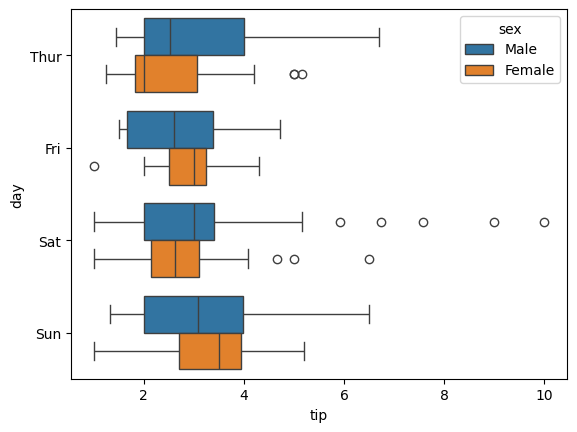

In [11]:
sns.boxplot(
    data=tips,
    x='tip',
    y='day',
    hue='sex')

plt.show()

In ultimo proviamo a visualizzare la heatmap definita a partire da un array NumPy:

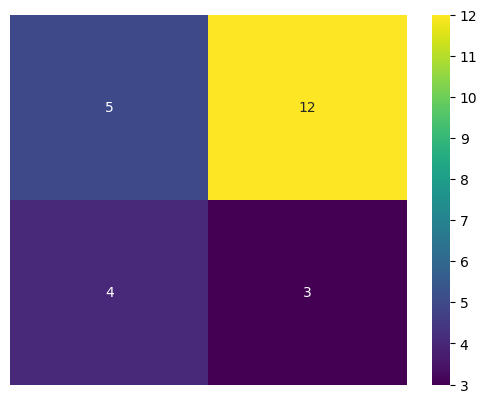

In [12]:
ar = np.array([[5, 12], [4, 3]])
sns.heatmap(ar, cmap='viridis', annot=True, xticklabels=False, yticklabels=False)
plt.show()

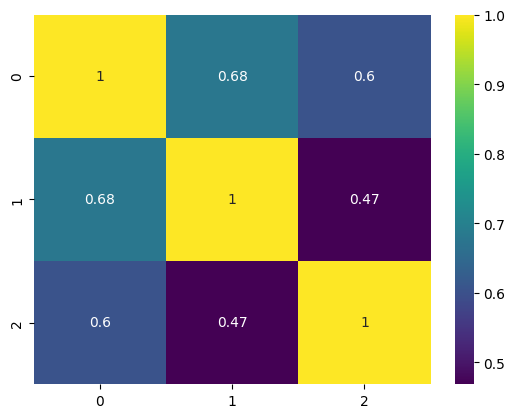

In [13]:
corr = tips.corr(method='spearman', numeric_only=True).values
sns.heatmap(corr, cmap='viridis', annot=True)
plt.show()

In [14]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000
